In [149]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# Read input data into a dataframe
data = pd.read_csv('dataset.csv', index_col=None, header=0, names=['date', 'user_id', 'continent', 'helpdesk_member', 'community_member'], encoding='utf-8')

In [3]:
# Check the first few rows of the data
data.head()

,date,user_id,continent,helpdesk_member,community_member
0,2019-03-25,4593,europe,True,True
1,2019-03-25,7858,NaN,NaN,NaN
2,2019-03-25,4700,NaN,NaN,NaN
3,2019-03-25,6533,NaN,NaN,NaN
4,2019-03-25,5034,NaN,NaN,NaN


In [4]:
# Check the minimum date
data['date'].min()

'2019-03-25'

In [5]:
# Check the maximum date
data['date'].max()

'2019-04-12'

In [6]:
# Summarize the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2999999 entries, 0 to 2999998
Data columns (total 5 columns):
date                object
user_id             int64
continent           object
helpdesk_member     object
community_member    object
dtypes: int64(1), object(4)
memory usage: 114.4+ MB


In [7]:
# Check the dimensions of the data
data.shape

(2999999, 5)

In [8]:
# Check the distribution of continent
data['continent'].value_counts()

north america    233092
europe           176787
australia        100201
africa            71275
asia              28147
Name: continent, dtype: int64

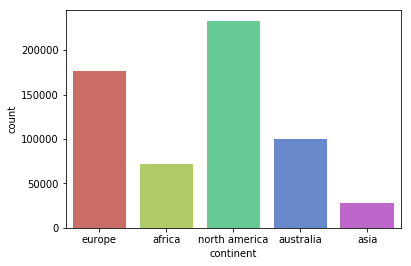

In [9]:
# Plot the distribution of continent
sns.countplot(x='continent', data=data, palette='hls')
plt.show()

In [10]:
# Check the distribution of helpdesk membership
data['helpdesk_member'].value_counts()

True     350606
False    258896
Name: helpdesk_member, dtype: int64

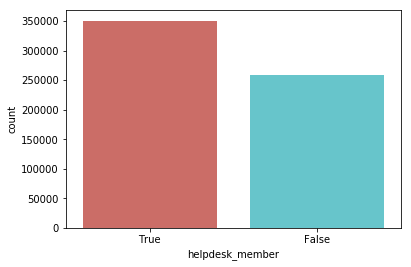

In [11]:
# Plot the distribution of helpdesk membership
sns.countplot(x='helpdesk_member', data=data, palette='hls')
plt.show()

In [12]:
# Check the distribution of community membership
data['community_member'].value_counts()

True     478844
False    130658
Name: community_member, dtype: int64

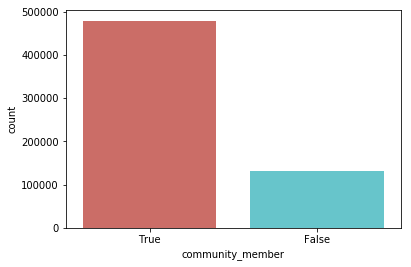

In [13]:
# Plot the distribution of community membership
sns.countplot(x='community_member', data=data, palette='hls')
plt.show()

In [14]:
# Check the dataframe for missing values
data.isnull().sum()

date                      0
user_id                   0
continent           2390497
helpdesk_member     2390497
community_member    2390497
dtype: int64

In [15]:
# Function to compute the number and percentage of missing values in a dataframe
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [16]:
# Apply the function to our dataframe
missing_values_table(data)

Your selected dataframe has 5 columns.
There are 3 columns that have missing values.


,Missing Values,% of Total Values
continent,2390497,79.7
helpdesk_member,2390497,79.7
community_member,2390497,79.7


In [17]:
# Feature Engineering

In [18]:
# Create new features for date
data['month'] = data['date'].astype(str).str[5:7].astype(int)
data['day'] = data['date'].astype(str).str[8:10].astype(int)

In [19]:
# Check the data
data.head()

,date,user_id,continent,helpdesk_member,community_member,month,day
0,2019-03-25,4593,europe,True,True,3,25
1,2019-03-25,7858,NaN,NaN,NaN,3,25
2,2019-03-25,4700,NaN,NaN,NaN,3,25
3,2019-03-25,6533,NaN,NaN,NaN,3,25
4,2019-03-25,5034,NaN,NaN,NaN,3,25


In [20]:
# Check the distribution of the newly created month variable
data['month'].value_counts()

4    1892522
3    1107477
Name: month, dtype: int64

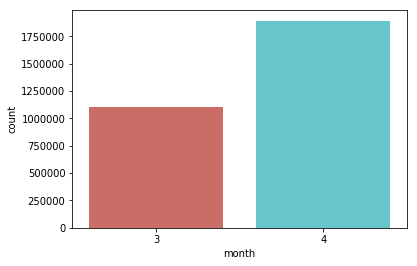

In [21]:
# Plot the distribution of the newly created month variable
sns.countplot(x='month', data=data, palette='hls')
plt.show()

In [22]:
# Check the distribution of the newly created day variable
data['day'].value_counts()

27    158811
5     158653
31    158476
7     158457
4     158442
6     158407
28    158396
11    158330
25    158308
26    158288
10    158092
2     157988
9     157964
29    157663
3     157586
8     157564
30    157535
1     157505
12    153534
Name: day, dtype: int64

In [23]:
# One hot encoding
continent = pd.get_dummies(data['continent'], prefix='continent')
helpdesk_member = pd.get_dummies(data['helpdesk_member'], prefix='helpdesk_member')
community_member = pd.get_dummies(data['community_member'], prefix='community_member')

data2 = pd.concat([data, continent, helpdesk_member, community_member],axis=1)

In [24]:
# Check the new dataframe
data2.head()

,date,user_id,continent,helpdesk_member,community_member,month,day,continent_africa,continent_asia,continent_australia,continent_europe,continent_north america,helpdesk_member_False,helpdesk_member_True,community_member_False,community_member_True
0,2019-03-25,4593,europe,True,True,3,25,0,0,0,1,0,0,1,0,1
1,2019-03-25,7858,NaN,NaN,NaN,3,25,0,0,0,0,0,0,0,0,0
2,2019-03-25,4700,NaN,NaN,NaN,3,25,0,0,0,0,0,0,0,0,0
3,2019-03-25,6533,NaN,NaN,NaN,3,25,0,0,0,0,0,0,0,0,0
4,2019-03-25,5034,NaN,NaN,NaN,3,25,0,0,0,0,0,0,0,0,0


In [25]:
# Create new indicator variables
data2['continent_ind'] = (data2['continent'].notnull()).astype(int)
data2['helpdesk_member_ind'] = (data2['helpdesk_member'].notnull()).astype(int)
data2['community_member_ind'] = (data2['community_member'].notnull()).astype(int)

In [26]:
# Check the new data
data2.head()

,date,user_id,continent,helpdesk_member,community_member,month,day,continent_africa,continent_asia,continent_australia,continent_europe,continent_north america,helpdesk_member_False,helpdesk_member_True,community_member_False,community_member_True,continent_ind,helpdesk_member_ind,community_member_ind
0,2019-03-25,4593,europe,True,True,3,25,0,0,0,1,0,0,1,0,1,1,1,1
1,2019-03-25,7858,NaN,NaN,NaN,3,25,0,0,0,0,0,0,0,0,0,0,0,0
2,2019-03-25,4700,NaN,NaN,NaN,3,25,0,0,0,0,0,0,0,0,0,0,0,0
3,2019-03-25,6533,NaN,NaN,NaN,3,25,0,0,0,0,0,0,0,0,0,0,0,0
4,2019-03-25,5034,NaN,NaN,NaN,3,25,0,0,0,0,0,0,0,0,0,0,0,0


In [27]:
# Check the proportion of missing values with the new features added
data2.isnull().sum()

date                             0
user_id                          0
continent                  2390497
helpdesk_member            2390497
community_member           2390497
month                            0
day                              0
continent_africa                 0
continent_asia                   0
continent_australia              0
continent_europe                 0
continent_north america          0
helpdesk_member_False            0
helpdesk_member_True             0
community_member_False           0
community_member_True            0
continent_ind                    0
helpdesk_member_ind              0
community_member_ind             0
dtype: int64

In [28]:
# Start building our model to predict 'continent'

In [29]:
# To build a model to predict values of continent, create 2 subsets - one with missing continent values
# and other with non-missing continent values. We will use the data with non-missing continent values to build
# the model
data2_continent_not_missing = data2[data2['continent'].notnull()]
data2_continent_missing = data2[data2['continent'].isnull()]

In [30]:
# Check the number of rows and columns
data2_continent_not_missing.shape

(609502, 19)

In [31]:
# Check the number of rows and columns
data2_continent_missing.shape

(2390497, 19)

In [32]:
# Transform the multiclass target variable (continent) into numeric categories
le = LabelEncoder()
y = data2_continent_not_missing['continent'].values
y = le.fit(y).transform(y)

In [33]:
# Select the dependent (target) and independent variables for the model
X = data2_continent_not_missing[[col for col in data2_continent_not_missing.columns if col not in ['date','user_id','continent','helpdesk_member','community_member','continent_ind','continent_africa','continent_asia','continent_australia','continent_europe','continent_north america']]]
traindata = pd.DataFrame(X)
traindata['continent'] = y
traindataclean = traindata.dropna(how = 'any')
X = traindataclean[[col for col in data2_continent_not_missing.columns if col not in ['date','user_id','continent','helpdesk_member','community_member','continent_ind','continent_africa','continent_asia','continent_australia','continent_europe','continent_north america']]]
y = traindataclean['continent']

In [34]:
# Split the data into train and test samples with 65% of the data for training and 35% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.35, random_state=42)

In [35]:
# Build the model using the Gradient Boosting Classifier
GB = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=1000, n_estimators=100, max_features=5, max_depth=5, random_state=None)

# Fit and score the model on the train data
GB.fit(X_train, y_train)
GB.score(X_train, y_train)

0.3821230968054602

In [36]:
# Score the model on the test data
GB.score(X_test, y_test)

0.38312723249861713

In [37]:
# Generate the predictions on the test data
y_pred = GB.predict(X_test)

# Review metrics for the model performance
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[    0     0     0    76 24773]
 [    0     0     0    54  9773]
 [    0     0     0   267 34838]
 [    0     0     0   494 61280]
 [    0     0     0   534 81237]]
             precision    recall  f1-score   support

          0       0.00      0.00      0.00     24849
          1       0.00      0.00      0.00      9827
          2       0.00      0.00      0.00     35105
          3       0.35      0.01      0.02     61774
          4       0.38      0.99      0.55     81771

avg / total       0.25      0.38      0.22    213326



C:\Users\I55778\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [38]:
# Baseline model for predicting continent values
d = dict(zip(le.classes_, le.transform(le.classes_)))
print(d)

{'africa': 0, 'asia': 1, 'australia': 2, 'europe': 3, 'north america': 4}


In [39]:
# Continent 'North America' has the highest frequency
# Create a baseline model where all target classes have a value of 4 for 'North America'
y_pred_base = np.empty(len(y_pred), dtype=np.int)
y_pred_base.fill(4)
y_pred_base

array([4, 4, 4, ..., 4, 4, 4])

In [40]:
# Review metrics for base model
print(confusion_matrix(y_test, y_pred_base))
print(classification_report(y_test, y_pred_base))

[[    0     0     0     0 24849]
 [    0     0     0     0  9827]
 [    0     0     0     0 35105]
 [    0     0     0     0 61774]
 [    0     0     0     0 81771]]
             precision    recall  f1-score   support

          0       0.00      0.00      0.00     24849
          1       0.00      0.00      0.00      9827
          2       0.00      0.00      0.00     35105
          3       0.00      0.00      0.00     61774
          4       0.38      1.00      0.55     81771

avg / total       0.15      0.38      0.21    213326



C:\Users\I55778\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [42]:
# Create function to impute missing values in 'continent' using the Gradient Boosting model
def impute_missing_values_continent(data, col_name):
    X_col = [col for col in data.columns if col not in ['date','user_id','helpdesk_member','community_member','continent_ind','continent_africa','continent_asia','continent_australia','continent_europe','continent_north america']]
    data_with_null = data[X_col]
    data_without_null = data_with_null.dropna()
    X_col_2 = [col for col in data.columns if (col != col_name and col not in ['date','user_id','helpdesk_member','community_member','continent_ind','continent_africa','continent_asia','continent_australia','continent_europe','continent_north america'])]
    X = data_without_null[X_col_2]
    y = data_without_null[col_name]
    model = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=1000, n_estimators=100, max_features=5, max_depth=5, random_state=None)
    model.fit(X, y)
    X_test = data_with_null[X_col_2]
    predicted = pd.Series(model.predict(X_test))
    data_with_null[col_name].fillna(predicted,inplace=True)
    data.drop([col_name],axis=1,inplace=True)
    data[col_name] = data_with_null[col_name]
    return data

In [43]:
# Execute function to impute missing values in continent
impute_missing_values_continent(data2, 'continent')

C:\Users\I55778\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:4355: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,date,user_id,helpdesk_member,community_member,month,day,continent_africa,continent_asia,continent_australia,continent_europe,continent_north america,helpdesk_member_False,helpdesk_member_True,community_member_False,community_member_True,continent_ind,helpdesk_member_ind,community_member_ind,continent
0,2019-03-25,4593,True,True,3,25,0,0,0,1,0,0,1,0,1,1,1,1,europe
1,2019-03-25,7858,NaN,NaN,3,25,0,0,0,0,0,0,0,0,0,0,0,0,north america
2,2019-03-25,4700,NaN,NaN,3,25,0,0,0,0,0,0,0,0,0,0,0,0,north america
3,2019-03-25,6533,NaN,NaN,3,25,0,0,0,0,0,0,0,0,0,0,0,0,north america
4,2019-03-25,5034,NaN,NaN,3,25,0,0,0,0,0,0,0,0,0,0,0,0,north america
5,2019-03-25,2149,NaN,NaN,3,25,0,0,0,0,0,0,0,0,0,0,0,0,north america
6,2019-03-25,7964,True,True,3,25,1,0,0,0,0,0,1,0,1,1,1,1,africa
7,2019-03-25,8424,NaN,NaN,3,25,0,0,0,0,0,0,0,0,0,0,0,0,north america
8,2019-03-25,3552,NaN,NaN,3,25,0,0,0,0,0,0,0,0,0,0,0,0,north america
9,2019-03-25,6860,NaN,NaN,3,25,0,0,0,0,0,0,0,0,0,0,0,0,north america


In [44]:
# Check the proportion of missing values again after imputation is performed in 'continent'
data2.isnull().sum()

date                             0
user_id                          0
helpdesk_member            2390497
community_member           2390497
month                            0
day                              0
continent_africa                 0
continent_asia                   0
continent_australia              0
continent_europe                 0
continent_north america          0
helpdesk_member_False            0
helpdesk_member_True             0
community_member_False           0
community_member_True            0
continent_ind                    0
helpdesk_member_ind              0
community_member_ind             0
continent                        0
dtype: int64

In [45]:
# One hot encoding for the month variable
month = pd.get_dummies(data2['month'], prefix='month')

data3 = pd.concat([data2, month],axis=1)

In [46]:
# Check the data
data3.head()

,date,user_id,helpdesk_member,community_member,month,day,continent_africa,continent_asia,continent_australia,continent_europe,...,helpdesk_member_False,helpdesk_member_True,community_member_False,community_member_True,continent_ind,helpdesk_member_ind,community_member_ind,continent,month_3,month_4
0,2019-03-25,4593,True,True,3,25,0,0,0,1,...,0,1,0,1,1,1,1,europe,1,0
1,2019-03-25,7858,NaN,NaN,3,25,0,0,0,0,...,0,0,0,0,0,0,0,north america,1,0
2,2019-03-25,4700,NaN,NaN,3,25,0,0,0,0,...,0,0,0,0,0,0,0,north america,1,0
3,2019-03-25,6533,NaN,NaN,3,25,0,0,0,0,...,0,0,0,0,0,0,0,north america,1,0
4,2019-03-25,5034,NaN,NaN,3,25,0,0,0,0,...,0,0,0,0,0,0,0,north america,1,0


In [47]:
# Building model to predict 'helpdesk membership'

In [48]:
# To build a model to predict values of helpdesk membership, create 2 subsets - one with missing helpdesk
# membership values and other with non-missing helpdesk membership values. We will use the data with non-missing  
# membership values to build the model
data3_helpdesk_not_missing = data3[data3['helpdesk_member'].notnull()]
data3_helpdesk_missing = data3[data3['helpdesk_member'].isnull()]

In [49]:
# Check the number of rows and columns
data3_helpdesk_not_missing.shape

(609502, 21)

In [50]:
# Check the number of rows and columns
data3_helpdesk_missing.shape

(2390497, 21)

In [51]:
# Transform the multiclass target variable (helpdesk membership) into numeric categories
le = LabelEncoder()
y = data3_helpdesk_not_missing['helpdesk_member'].values
y = le.fit(y).transform(y)

In [52]:
# Select the dependent (target) and independent variables for the model
X = data3_helpdesk_not_missing[[col for col in data3_helpdesk_not_missing.columns if col not in ['date','user_id','month','continent','helpdesk_member','community_member','helpdesk_member_ind','helpdesk_member_True','helpdesk_member_False']]]
traindata = pd.DataFrame(X)
traindata['helpdesk_member'] = y
traindataclean = traindata.dropna(how = 'any')
X = traindataclean[[col for col in data3_helpdesk_not_missing.columns if col not in ['date','user_id','month','continent','helpdesk_member','community_member','helpdesk_member_ind','helpdesk_member_True','helpdesk_member_False']]]
y = traindataclean['helpdesk_member']

In [53]:
# Split the data into train and test samples with 70% of the data for training and 30% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=42)

In [54]:
# Build the model using the Gradient Boosting Classifier
GB = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=1000, n_estimators=100, max_features=5, max_depth=5, random_state=None)

# Fit and score the model on the train data
GB.fit(X_train, y_train)
GB.score(X_train, y_train)

0.5756039479574641

In [55]:
# Score the model on the test data
GB.score(X_test, y_test)

0.5751896352768101

In [56]:
# Generate the predictions on the test data
y_pred = GB.predict(X_test)

# Review metrics for the model performance
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[   517  77205]
 [   472 104657]]
             precision    recall  f1-score   support

          0       0.52      0.01      0.01     77722
          1       0.58      1.00      0.73    105129

avg / total       0.55      0.58      0.42    182851



In [57]:
# Baseline model for predicting helpdesk membership
d = dict(zip(le.classes_, le.transform(le.classes_)))
print(d)

{False: 0, True: 1}


In [58]:
# Helpdesk membership of "True" has the highest frequency
# Create a baseline model where all target classes have a value of 1 for 'Helpdesk membership'
y_pred_base = np.empty(len(y_pred), dtype=np.int)
y_pred_base.fill(1)
y_pred_base

array([1, 1, 1, ..., 1, 1, 1])

In [59]:
# Review metrics for base model
print(confusion_matrix(y_test, y_pred_base))
print(classification_report(y_test, y_pred_base))

[[     0  77722]
 [     0 105129]]
             precision    recall  f1-score   support

          0       0.00      0.00      0.00     77722
          1       0.57      1.00      0.73    105129

avg / total       0.33      0.57      0.42    182851



C:\Users\I55778\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [92]:
# Create function to impute missing values in 'helpdesk membership' using the Gradient Boosting Classifier
def impute_missing_values_helpdesk(data, col_name):
    X_col = [col for col in data.columns if col not in ['date','user_id','month','continent','community_member','helpdesk_member_ind','helpdesk_member_True','helpdesk_member_False']]
    data_with_null = data[X_col]
    data_without_null = data_with_null.dropna()
    X_col_2 = [col for col in data.columns if (col != col_name and col not in ['date','user_id','month','continent','community_member','helpdesk_member_ind','helpdesk_member_True','helpdesk_member_False'])]
    X = data_without_null[X_col_2]
    y = data_without_null[col_name]
    y = y.astype('int')
    model = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=1000, n_estimators=100, max_features=5, max_depth=5, random_state=None)
    model.fit(X, y)
    X_test = data_with_null[X_col_2]
    predicted = pd.Series(model.predict(X_test)).astype('bool')
    data_with_null[col_name].fillna(predicted,inplace=True)
    data.drop([col_name],axis=1,inplace=True)
    data[col_name] = data_with_null[col_name]
    return data

In [93]:
# Execute function to impute missing values for helpdesk membership
impute_missing_values_helpdesk(data3, 'helpdesk_member')

C:\Users\I55778\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:4355: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,date,user_id,community_member,month,day,continent_africa,continent_asia,continent_australia,continent_europe,continent_north america,...,helpdesk_member_True,community_member_False,community_member_True,continent_ind,helpdesk_member_ind,community_member_ind,continent,month_3,month_4,helpdesk_member
0,2019-03-25,4593,True,3,25,0,0,0,1,0,...,1,0,1,1,1,1,europe,1,0,True
1,2019-03-25,7858,NaN,3,25,0,0,0,0,0,...,0,0,0,0,0,0,north america,1,0,True
2,2019-03-25,4700,NaN,3,25,0,0,0,0,0,...,0,0,0,0,0,0,north america,1,0,True
3,2019-03-25,6533,NaN,3,25,0,0,0,0,0,...,0,0,0,0,0,0,north america,1,0,True
4,2019-03-25,5034,NaN,3,25,0,0,0,0,0,...,0,0,0,0,0,0,north america,1,0,True
5,2019-03-25,2149,NaN,3,25,0,0,0,0,0,...,0,0,0,0,0,0,north america,1,0,True
6,2019-03-25,7964,True,3,25,1,0,0,0,0,...,1,0,1,1,1,1,africa,1,0,True
7,2019-03-25,8424,NaN,3,25,0,0,0,0,0,...,0,0,0,0,0,0,north america,1,0,True
8,2019-03-25,3552,NaN,3,25,0,0,0,0,0,...,0,0,0,0,0,0,north america,1,0,True
9,2019-03-25,6860,NaN,3,25,0,0,0,0,0,...,0,0,0,0,0,0,north america,1,0,True


In [ ]:
# Building model to predict 'community membership'

In [150]:
# To build a model to predict values of community membership, create 2 subsets - one with missing community
# membership values and other with non-missing community membership values. We will use the data with non-missing  
# membership values to build the model
data3_community_not_missing = data3[data3['community_member'].notnull()]
data3_community_missing = data3[data3['community_member'].isnull()]

In [151]:
# Check the number of rows and columns
data3_community_not_missing.shape

(609502, 21)

In [152]:
# Check the number of rows and columns
data3_community_missing.shape

(2390497, 21)

In [153]:
# Transform the multiclass target variable (helpdesk membership) into numeric categories
le = LabelEncoder()
y = data3_community_not_missing['community_member'].values
y = le.fit(y).transform(y)

In [154]:
# Select the dependent (target) and independent variables for the model
X = data3_community_not_missing[[col for col in data3_community_not_missing.columns if col not in ['date','user_id','month','continent','helpdesk_member','community_member','community_member_ind','community_member_True','community_member_False']]]
traindata = pd.DataFrame(X)
traindata['community_member'] = y
traindataclean = traindata.dropna(how = 'any')
X = traindataclean[[col for col in data3_community_not_missing.columns if col not in ['date','user_id','month','continent','helpdesk_member','community_member','community_member_ind','community_member_True','community_member_False']]]
y = traindataclean['community_member']

In [155]:
# Split the data into train and test samples with 70% of the data for training and 30% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=42)

In [156]:
# Build the model using the Gradient Boosting Classifier
GB = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=1000, n_estimators=100, max_features=5, max_depth=5, random_state=None)

# Fit and score the model on the train data
GB.fit(X_train, y_train)
GB.score(X_train, y_train)

0.7851803933425681

In [158]:
# Score the model on the test data
GB.score(X_test, y_test)

0.7866842401736933

In [159]:
# Generate the predictions on the test data
y_pred = GB.predict(X_test)

# Review metrics for the model performance
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[     0  39005]
 [     0 143846]]
             precision    recall  f1-score   support

          0       0.00      0.00      0.00     39005
          1       0.79      1.00      0.88    143846

avg / total       0.62      0.79      0.69    182851



C:\Users\I55778\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [160]:
# Baseline model for predicting community membership
d = dict(zip(le.classes_, le.transform(le.classes_)))
print(d)

{False: 0, True: 1}


In [161]:
# Community membership of "True" has the highest frequency
# Create a baseline model where all target classes have a value of 1 for 'Community membership'
y_pred_base = np.empty(len(y_pred), dtype=np.int)
y_pred_base.fill(1)
y_pred_base

array([1, 1, 1, ..., 1, 1, 1])

In [162]:
# Review metrics for base model
print(confusion_matrix(y_test, y_pred_base))
print(classification_report(y_test, y_pred_base))

[[     0  39005]
 [     0 143846]]
             precision    recall  f1-score   support

          0       0.00      0.00      0.00     39005
          1       0.79      1.00      0.88    143846

avg / total       0.62      0.79      0.69    182851



C:\Users\I55778\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [163]:
# Create function to impute missing values in 'community membership' using the Gradient Boosting Classifier
def impute_missing_values_community(data, col_name):
    X_col = [col for col in data.columns if col not in ['date','user_id','month','continent','helpdesk_member','community_member_ind','community_member_True','community_member_False']]
    data_with_null = data[X_col]
    data_without_null = data_with_null.dropna()
    X_col_2 = [col for col in data.columns if (col != col_name and col not in ['date','user_id','month','continent','helpdesk_member','community_member_ind','community_member_True','community_member_False'])]
    X = data_without_null[X_col_2]
    y = data_without_null[col_name]
    y = y.astype('int')
    model = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=1000, n_estimators=100, max_features=5, max_depth=5, random_state=None)
    model.fit(X, y)
    X_test = data_with_null[X_col_2]
    predicted = pd.Series(model.predict(X_test)).astype('bool')
    data_with_null[col_name].fillna(predicted,inplace=True)
    data.drop([col_name],axis=1,inplace=True)
    data[col_name] = data_with_null[col_name]
    return data

In [164]:
# Execute function to impute values for community membership
impute_missing_values_community(data3, 'community_member')

C:\Users\I55778\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:4355: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,date,user_id,month,day,continent_africa,continent_asia,continent_australia,continent_europe,continent_north america,helpdesk_member_False,...,community_member_False,community_member_True,continent_ind,helpdesk_member_ind,community_member_ind,continent,month_3,month_4,helpdesk_member,community_member
0,2019-03-25,4593,3,25,0,0,0,1,0,0,...,0,1,1,1,1,europe,1,0,True,True
1,2019-03-25,7858,3,25,0,0,0,0,0,0,...,0,0,0,0,0,north america,1,0,True,True
2,2019-03-25,4700,3,25,0,0,0,0,0,0,...,0,0,0,0,0,north america,1,0,True,True
3,2019-03-25,6533,3,25,0,0,0,0,0,0,...,0,0,0,0,0,north america,1,0,True,True
4,2019-03-25,5034,3,25,0,0,0,0,0,0,...,0,0,0,0,0,north america,1,0,True,True
5,2019-03-25,2149,3,25,0,0,0,0,0,0,...,0,0,0,0,0,north america,1,0,True,True
6,2019-03-25,7964,3,25,1,0,0,0,0,0,...,0,1,1,1,1,africa,1,0,True,True
7,2019-03-25,8424,3,25,0,0,0,0,0,0,...,0,0,0,0,0,north america,1,0,True,True
8,2019-03-25,3552,3,25,0,0,0,0,0,0,...,0,0,0,0,0,north america,1,0,True,True
9,2019-03-25,6860,3,25,0,0,0,0,0,0,...,0,0,0,0,0,north america,1,0,True,True


In [168]:
# Create Final Dataframe
final_df = data3[['date', 'user_id', 'continent', 'helpdesk_member', 'community_member']]

In [174]:
# Check Final Dataframe
final_df.head()

,date,user_id,continent,helpdesk_member,community_member
0,2019-03-25,4593,europe,True,True
1,2019-03-25,7858,north america,True,True
2,2019-03-25,4700,north america,True,True
3,2019-03-25,6533,north america,True,True
4,2019-03-25,5034,north america,True,True


In [175]:
# Check Final Dataframe
final_df.tail()

,date,user_id,continent,helpdesk_member,community_member
2999994,2019-04-12,806,north america,True,True
2999995,2019-04-12,2546,north america,True,True
2999996,2019-04-12,5642,north america,True,True
2999997,2019-04-12,895,north america,True,True
2999998,2019-04-12,6304,north america,True,True


In [176]:
# Check for missing values
final_df.isnull().sum()

date                0
user_id             0
continent           0
helpdesk_member     0
community_member    0
dtype: int64

In [180]:
# Export Final Dataframe to Original format (CSV file)
final_df.to_csv("output.csv", sep=',', encoding='utf-8')